In [1]:
import cv2
import pandas as pd
from deepface import DeepFace
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
cd "C:\碩二上\心理與神經資訊學\computer-vision-realtjr"

C:\碩二上\心理與神經資訊學\computer-vision-realtjr


In [3]:
video_path = "vlog.mp4"   # ← 改成你的路徑
cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = total_frames / fps

print("FPS:", fps)
print("Total frames:", total_frames)
print("Duration (sec):", duration)


FPS: 30.0
Total frames: 1504
Duration (sec): 50.13333333333333


In [4]:
results = []

# 每秒擷取 1 frame
for sec in tqdm(range(int(duration))):
    cap.set(cv2.CAP_PROP_POS_MSEC, sec * 1000)

    ret, frame = cap.read()
    if not ret:
        results.append([sec, "no_frame", {}])
        continue

    try:
        analyze = DeepFace.analyze(
            frame,
            actions=["emotion"],
            enforce_detection=False
        )
        
        emotion = analyze[0]["dominant_emotion"]
        all_scores = analyze[0]["emotion"]

        results.append([sec, emotion, all_scores])

        print(sec, "sec →", emotion)

    except Exception as e:
        print(sec, "sec Error:", e)
        results.append([sec, "error", {}])

cap.release()


  4%|▍         | 2/50 [00:01<00:23,  2.03it/s]

0 sec → sad
1 sec → sad


  8%|▊         | 4/50 [00:01<00:11,  4.07it/s]

2 sec → sad
3 sec → sad


 12%|█▏        | 6/50 [00:01<00:07,  5.72it/s]

4 sec → neutral
5 sec → happy


 16%|█▌        | 8/50 [00:01<00:06,  6.95it/s]

6 sec → sad
7 sec → sad


 20%|██        | 10/50 [00:02<00:05,  7.36it/s]

8 sec → sad
9 sec → sad


 24%|██▍       | 12/50 [00:02<00:04,  7.64it/s]

10 sec → fear
11 sec → neutral


 28%|██▊       | 14/50 [00:02<00:04,  7.70it/s]

12 sec → sad
13 sec → sad


 32%|███▏      | 16/50 [00:02<00:04,  7.15it/s]

14 sec → sad
15 sec → fear


 36%|███▌      | 18/50 [00:03<00:04,  7.51it/s]

16 sec → neutral
17 sec → fear


 40%|████      | 20/50 [00:03<00:03,  7.63it/s]

18 sec → happy
19 sec → sad


 44%|████▍     | 22/50 [00:03<00:03,  7.83it/s]

20 sec → sad
21 sec → sad


 48%|████▊     | 24/50 [00:03<00:03,  7.33it/s]

22 sec → sad
23 sec → neutral


 52%|█████▏    | 26/50 [00:04<00:03,  6.88it/s]

24 sec → sad
25 sec → neutral


 56%|█████▌    | 28/50 [00:04<00:03,  7.14it/s]

26 sec → fear
27 sec → happy


 60%|██████    | 30/50 [00:04<00:02,  6.81it/s]

28 sec → neutral
29 sec → sad


 64%|██████▍   | 32/50 [00:05<00:02,  7.21it/s]

30 sec → sad
31 sec → sad


 68%|██████▊   | 34/50 [00:05<00:02,  7.60it/s]

32 sec → sad
33 sec → sad


 72%|███████▏  | 36/50 [00:05<00:01,  7.29it/s]

34 sec → fear
35 sec → fear


 76%|███████▌  | 38/50 [00:05<00:01,  7.90it/s]

36 sec → sad
37 sec → happy


 80%|████████  | 40/50 [00:06<00:01,  7.89it/s]

38 sec → happy
39 sec → neutral


 84%|████████▍ | 42/50 [00:06<00:01,  7.72it/s]

40 sec → fear
41 sec → sad


 88%|████████▊ | 44/50 [00:06<00:00,  7.86it/s]

42 sec → sad
43 sec → neutral


 92%|█████████▏| 46/50 [00:06<00:00,  7.51it/s]

44 sec → sad
45 sec → happy


 96%|█████████▌| 48/50 [00:07<00:00,  7.75it/s]

46 sec → happy
47 sec → neutral


100%|██████████| 50/50 [00:07<00:00,  6.72it/s]

48 sec → sad
49 sec → angry


In [5]:
df = pd.DataFrame(results, columns=["time_sec", "dominant_emotion", "scores"])
df.to_csv("vlog_emotions.csv", index=False)
df.head()


,time_sec,dominant_emotion,scores
0,0,sad,"{'angry': 1.4149360270760076, 'disgust': 9.834..."
1,1,sad,"{'angry': 0.1619813594657993, 'disgust': 4.181..."
2,2,sad,"{'angry': 0.12166922965427991, 'disgust': 1.31..."
3,3,sad,"{'angry': 7.2685375809669495, 'disgust': 0.002..."
4,4,neutral,"{'angry': 1.3560029678046703, 'disgust': 0.000..."


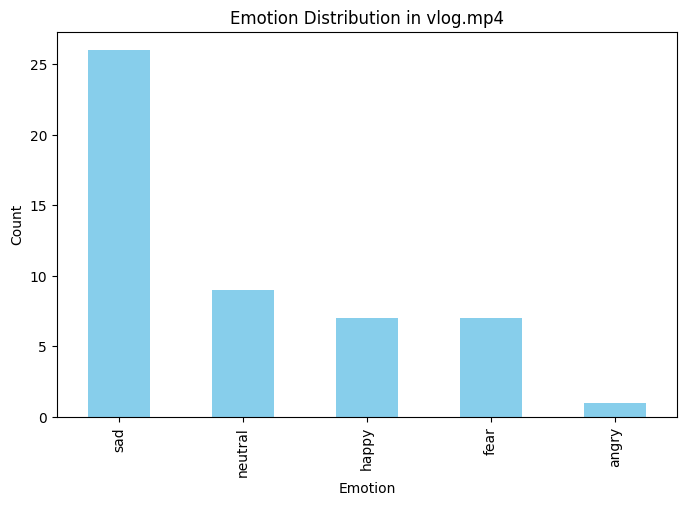

In [6]:
plt.figure(figsize=(8,5))
df["dominant_emotion"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Emotion Distribution in vlog.mp4")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()


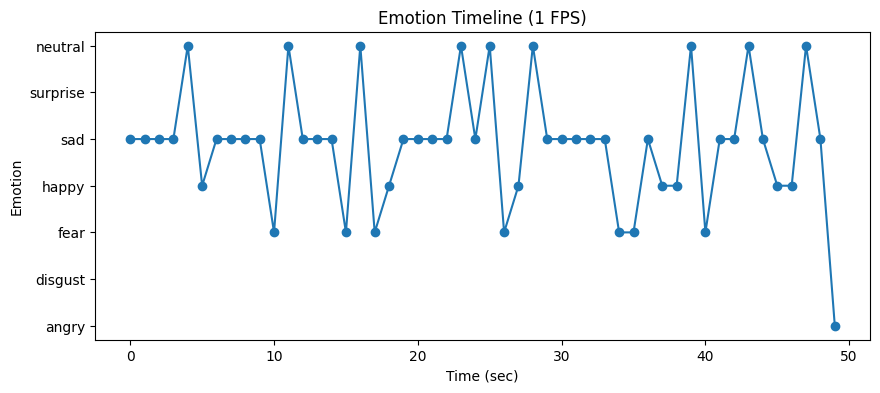

In [8]:
emo_map = { 
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "sad": 4,
    "surprise": 5,
    "neutral": 6,
    "error": None,
    "no_frame": None
}

df["emo_code"] = df["dominant_emotion"].map(emo_map)

# 只保留有數值的情緒 (0~6)，不要包含 None
valid_ticks = [v for v in emo_map.values() if isinstance(v, int)]
valid_labels = [k for k, v in emo_map.items() if isinstance(v, int)]

plt.figure(figsize=(10,4))
plt.plot(df["time_sec"], df["emo_code"], marker="o")

plt.yticks(valid_ticks, valid_labels)

plt.title("Emotion Timeline (1 FPS)")
plt.xlabel("Time (sec)")
plt.ylabel("Emotion")
plt.show()
